In [1]:
import sys
sys.path.append('..')

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import seaborn as sns

from sentiment import sentiment_vader
from imdb_api.imdbscraper import ImdbScraper

from scipy import stats

In [2]:
df = pd.read_csv('../notebooks/final_data.csv')

C:\Users\marcu\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3418: DtypeWarning: Columns (19,24) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df.primaryTitle.value_counts()[40:60]

Alice in Borderland                                3960
Red Notice                                         3698
Falling for Christmas                              3674
The Dirt                                           3576
Blockbuster                                        3484
Outlaw King                                        3467
The Tinder Swindler                                3459
Love Hard                                          3407
Enola Holmes 2                                     3371
Kate                                               3346
The Lord of the Rings: The Rings of Power          3326
Bridgerton                                         3317
The School for Good and Evil                       3317
Space Jam: A New Legacy                            3088
The Princess Switch: Switched Again                2884
Sweet Girl                                         2854
Our Universe                                       2827
Raised by Wolves                                

In [4]:
title = "Eurovision Song Contest: The Story of Fire Saga"

In [5]:
df = df[df.primaryTitle == title]
df['dt'] = pd.to_datetime(df.publishedAt)

In [6]:
df['date'] = df.dt.dt.date

In [7]:
release = pd.to_datetime(df.release_date_us.unique()[0])
upper_date_lim = release + pd.Timedelta(30, "d")
df = df[df.date <= upper_date_lim]

C:\Users\marcu\AppData\Roaming\Python\Python38\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


In [8]:
release

Timestamp('2020-06-26 00:00:00')

In [9]:
upper_date_lim

Timestamp('2020-07-26 00:00:00')

In [10]:
agg = df.groupby('date').agg(
    asdf=('commentId', 'count'),
    sentiment=('sentiment_predicted_score', 'mean')
).reset_index()

In [11]:
agg = agg.sort_values('date')

In [12]:
window_size = 7
trend = agg.sentiment.rolling(window=window_size, center=True).mean()
trend_count = agg.asdf.rolling(window=window_size, center=True).mean()

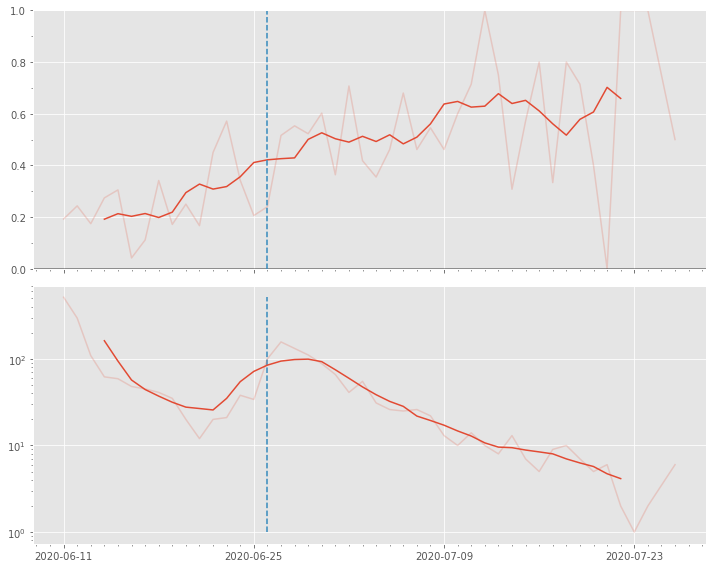

In [15]:
plt.style.use('ggplot')
fig, axes = plt.subplots(2, figsize=(10,8))


# sentiment over time
ax = axes[0]

ax.plot(agg.date, trend)
ax.plot(agg.date, agg.sentiment, alpha=.2, color='#E24A33')

ax.xaxis.set_major_locator(MultipleLocator(14))
ax.xaxis.set_minor_locator(MultipleLocator(1))

ax.yaxis.set_major_locator(MultipleLocator(.2))
ax.yaxis.set_minor_locator(MultipleLocator(.1))
ax.set_xticklabels([])

ax.set_ylim(0, 1)

ax.axhline(y=0, color='k', alpha=.5)
ax.axvline(x=release, color='#348ABD', linestyle='--')


# count of comments over time
ax = axes[1]

ax.plot(agg.date, trend_count)
ax.plot(agg.date, agg.asdf, color='#E24A33', alpha=.2)

ax.set_yscale('log')
ax.vlines(release, agg.asdf.min(), agg.asdf.max(), color='#348ABD', linestyle='--')

ax.xaxis.set_major_locator(MultipleLocator(14))
ax.xaxis.set_minor_locator(MultipleLocator(1))


plt.tight_layout()